✅ Best model: Linear Regression

=== Model Performance Summary ===

Random Forest
-------------
R² Score     : 0.9572
MAE          : 3595.76
MSE          : 21998344.81

Linear Regression
-----------------
R² Score     : 0.9932
MAE          : 1450.13
MSE          : 3501306.90

Gradient Boosting
-----------------
R² Score     : 0.9764
MAE          : 2978.32
MSE          : 12105182.88

XGBoost
-------
R² Score     : 0.9923
MAE          : 1544.75
MSE          : 3963433.50


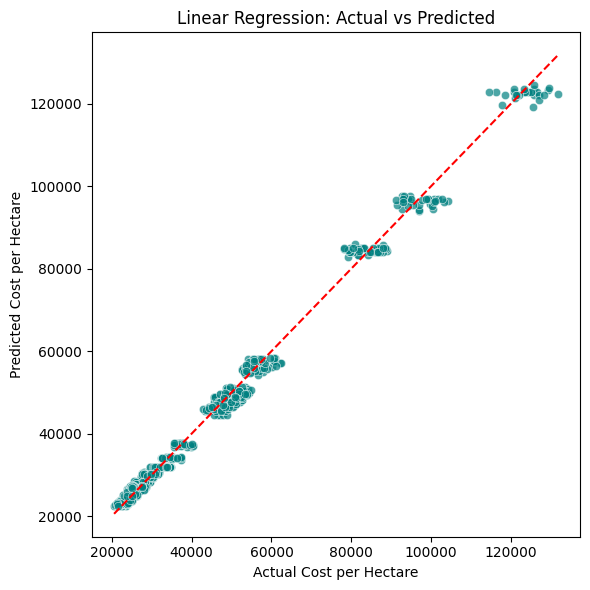

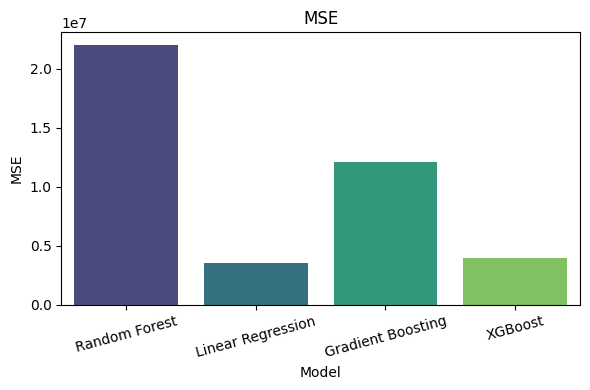

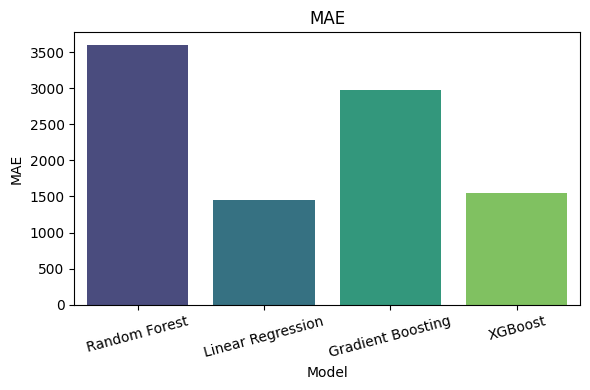

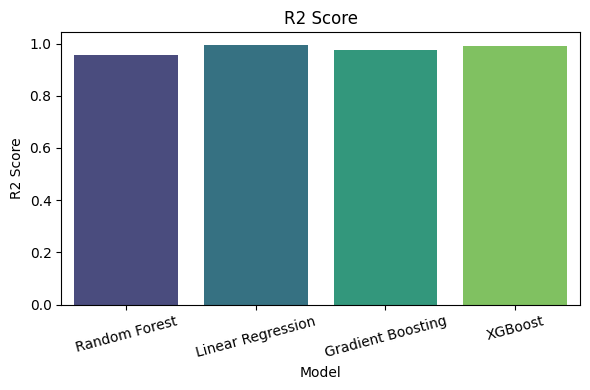

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("new_clean.csv")

# Split features and target
X = df.drop("Cost_per_Hectare", axis=1)
y = df["Cost_per_Hectare"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical_features = ["Crop", "Season", "State", "Soil_Type"]
numerical_features = ["Area"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("num", SimpleImputer(strategy="mean"), numerical_features)
])

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=50,max_depth=10, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=4, random_state=42, verbosity=0)}

# Train and evaluate
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        "pipeline": pipeline,
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# Choose best model by R²
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_pipeline = results[best_model_name]["pipeline"]

print(f"✅ Best model: {best_model_name}")

# Save best model
joblib.dump(best_pipeline, "final_model.joblib")

# Plot metrics
metrics_df = pd.DataFrame([
    {
        "Model": name,
        "MSE": res["MSE"],
        "MAE": res["MAE"],
        "R2 Score": res["R2"]
    } for name, res in results.items()
])

# Optional: Save metrics to CSV
metrics_df.to_csv("model_metrics.csv", index=False)

#print metrics

print("\n=== Model Performance Summary ===")
for name, res in results.items():
    print(f"\n{name}")
    print("-" * len(name))
    print(f"R² Score     : {res['R2']:.4f}")
    print(f"MAE          : {res['MAE']:.2f}")
    print(f"MSE          : {res['MSE']:.2f}")

#actual vs predicted

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual Cost per Hectare")
plt.ylabel("Predicted Cost per Hectare")
plt.title(f"{best_model_name}: Actual vs Predicted")
plt.tight_layout()
plt.show()

# Simple plot (optional)
for metric in ["MSE", "MAE", "R2 Score"]:
    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=metrics_df,
        x="Model",
        y=metric,
        hue="Model",              # Explicitly assign hue
        palette="viridis",        # Apply palette to hue
        legend=False              # Disable legend properly
    )
    plt.title(metric)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=15)
    plt.tight_layout()
   # plt.savefig(f"{metric.lower().replace(' ', '_')}_plot.png")
   # plt.close()

In [8]:
print(df["State"].dropna().unique())

['Andhra Pradesh' 'Odisha' 'Maharashtra' 'Karnataka' 'Tamil Nadu'
 'Madhya Pradesh' 'Uttar Pradesh' 'Rajasthan' 'Punjab' 'Telangana']
